# World Happiness Report - Feature Importance Analysis
## Will Holt & Michael Wise
## DATA 477 Capping
## Chapter 14 Project
## Spring 2023

TO DO:

* Basic drop and relearn and permute and relearn (Will)
* One hot encode variables that need it
  - Manipulate the data, export the manipulated data so it's easy to put in R
* SHAP (https://shap.readthedocs.io/en/latest/index.html) (Mike)
* LIME (https://github.com/marcotcr/lime) (Mike)
* Conditional variable importance (Will)
* Find more datasets

Models:
* Random Forest
* XGBoost
* Neural Network

Other Datasets:
* Heart Disease
* MNIST
* World Happiness Report
* Wine Reviews
* Data Science Job Salaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
hap = pd.read_csv('https://raw.githubusercontent.com/Will-Holt60/Test/master/World%20Happiness%20Report.csv')
hap = hap.iloc[:,[3,4,5,6,7,8,9,10,11,12]]
hap = hap.dropna(how='any',axis=0) 
hap

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...
2193,3.638300,7.754387,0.754147,52.150002,0.752826,-0.080725,0.751208,0.733641,0.224051,0.682647
2194,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726,0.550508
2195,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354,0.456455
2196,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736,0.577302


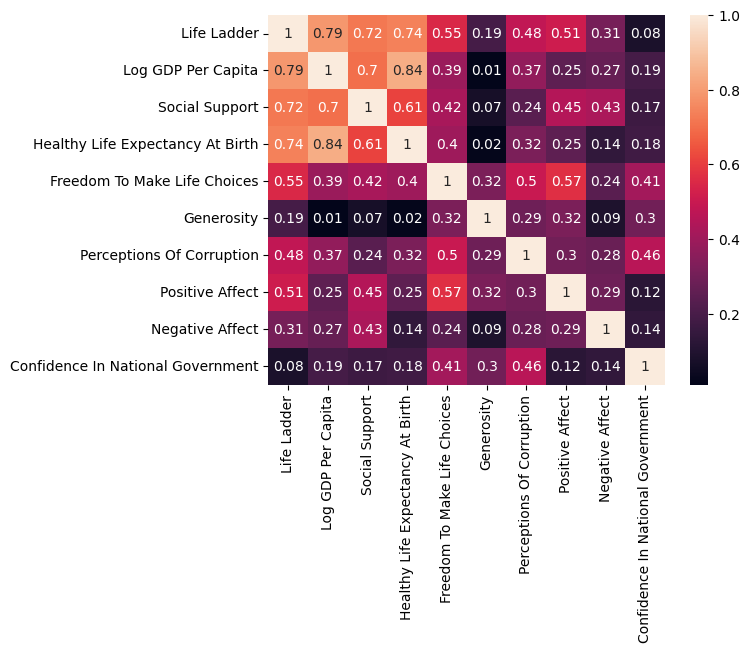

In [ ]:
matrix = abs(hap.corr().round(2))
sns.heatmap(matrix, annot=True)
plt.show()

In [ ]:
#!pip install -Iv rpy2==3.1.0
#run this once or it doesn't work because colab sucks and so does this package lol

In [ ]:
from rpy2 import robjects
values = robjects.r('''
          hap = read.csv('https://raw.githubusercontent.com/Will-Holt60/Test/master/World%20Happiness%20Report.csv')
          hap = hap[ , -c(1:3)]
          model = lm(Life.Ladder~., data=hap)
          summary(model)
         ''')

In [ ]:
print(values[3].rownames)


my_dict = {
    'Variables': values[3].rownames,
    'p-value': np.reshape(values[3], (10,4))[:,3],
}

 [1] "(Intercept)"                       "Log.GDP.Per.Capita"               
 [3] "Social.Support"                    "Healthy.Life.Expectancy.At.Birth" 
 [5] "Freedom.To.Make.Life.Choices"      "Generosity"                       
 [7] "Perceptions.Of.Corruption"         "Positive.Affect"                  
 [9] "Negative.Affect"                   "Confidence.In.National.Government"



In [ ]:
my_dict = {
    'Variables': np.array(values[3].rownames),
    'p-value': np.reshape(values[3], (10,4))[:,3],
}
data = pd.DataFrame(my_dict)
data.sort_values(by=['p-value'])

,Variables,p-value
1,Log.GDP.Per.Capita,2.695095e-49
7,Positive.Affect,3.798996e-34
6,Perceptions.Of.Corruption,1.514608e-30
2,Social.Support,8.032279e-21
9,Confidence.In.National.Government,6.081387e-14
3,Healthy.Life.Expectancy.At.Birth,1.358115e-13
0,(Intercept),2.889320e-11
4,Freedom.To.Make.Life.Choices,1.456266e-08
5,Generosity,3.145402e-08
8,Negative.Affect,9.362452e-01


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
#Ignore warnings or change drop and relearn function
#import warnings
#warnings.filterwarnings("ignore")

In [ ]:
y = hap['Life Ladder']
X = hap.drop('Life Ladder', axis=1)
numeric_features=[0,1,2,3,4,5,6,7,8]
categorical_features=[]
lin = LinearRegression()

## Drop and Relearn for Linear Regression

In [ ]:
def drop_fit(x, y, num, cat, model): 
  cat_xformer = make_pipeline(OneHotEncoder(drop='first'))
  num_xformer = make_pipeline(StandardScaler())

  X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=0)

  preprocessor = make_column_transformer((num_xformer, num),(cat_xformer, cat))

  pipe = make_pipeline(preprocessor, model)
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_val)
  
  return pd.DataFrame(data = list(zip(y_pred, y_val)), columns = ['y_pred', 'y_val'])

In [ ]:
def drop_learn(x, y, num, cat, model):
  fit = drop_fit(x, y, num, cat, model)
  r2 = r2_score(fit['y_val'], fit['y_pred'])
  ac_df = pd.DataFrame(columns = ['Variable Removed', 'R2'])
  ac_df = ac_df.append({'Variable Removed':'None', 'R2':r2}, ignore_index=True)
  for i in range(0, len(x.columns)):
    x_drop = x.drop(x.columns[i], axis=1)

    num_drop = [j for j in num if j != i]
    for j, v in enumerate(num_drop):
      if num_drop[j] > i: 
        num_drop[j] = v-1

    cat_drop = [j for j in cat if j != i]
    for j, v in enumerate(cat_drop):
      if cat_drop[j] > i: 
        cat_drop[j] = v-1

    fit = drop_fit(x_drop, y, num_drop, cat_drop, model)
    r2_metric = r2_score(fit['y_val'], fit['y_pred'])
    ac_df = ac_df.append({'Variable Removed':x.columns[i], 'R2':r2_metric}, ignore_index=True)

    ac_df['Difference'] = ac_df['R2'] - r2

  return ac_df.sort_values(by=['Difference'], ascending=True)


In [ ]:
dll = drop_learn(X, y, numeric_features, categorical_features, lin)
dll

<ipython-input-11-e2264e781194>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ac_df = ac_df.append({'Variable Removed':'None', 'R2':r2}, ignore_index=True)
<ipython-input-11-e2264e781194>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ac_df = ac_df.append({'Variable Removed':x.columns[i], 'R2':r2_metric}, ignore_index=True)
<ipython-input-11-e2264e781194>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ac_df = ac_df.append({'Variable Removed':x.columns[i], 'R2':r2_metric}, ignore_index=True)
<ipython-input-11-e2264e781194>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ac_df = ac_df.append({'Variable Removed':x.columns[i], 'R

,Variable Removed,R2,Difference
1,Log GDP Per Capita,0.760909,-0.024127
7,Positive Affect,0.762511,-0.022525
6,Perceptions Of Corruption,0.764622,-0.020414
2,Social Support,0.769697,-0.015340
9,Confidence In National Government,0.777264,-0.007772
5,Generosity,0.779451,-0.005586
4,Freedom To Make Life Choices,0.779688,-0.005349
3,Healthy Life Expectancy At Birth,0.784138,-0.000898
0,None,0.785037,0.000000
8,Negative Affect,0.785109,0.000072


##Drop and Relearn for Random Forest

In [ ]:
rf = RandomForestRegressor(max_depth=5, random_state=0)
dlr = drop_learn(X, y, numeric_features, categorical_features, rf)
dlr

<ipython-input-11-e2264e781194>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ac_df = ac_df.append({'Variable Removed':'None', 'R2':r2}, ignore_index=True)
<ipython-input-11-e2264e781194>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ac_df = ac_df.append({'Variable Removed':x.columns[i], 'R2':r2_metric}, ignore_index=True)
<ipython-input-11-e2264e781194>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ac_df = ac_df.append({'Variable Removed':x.columns[i], 'R2':r2_metric}, ignore_index=True)
<ipython-input-11-e2264e781194>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ac_df = ac_df.append({'Variable Removed':x.columns[i], 'R

,Variable Removed,R2,Difference
1,Log GDP Per Capita,0.796071,-0.039387
7,Positive Affect,0.816678,-0.018780
3,Healthy Life Expectancy At Birth,0.825428,-0.010030
2,Social Support,0.827442,-0.008016
6,Perceptions Of Corruption,0.834062,-0.001396
4,Freedom To Make Life Choices,0.834176,-0.001282
9,Confidence In National Government,0.834197,-0.001261
5,Generosity,0.834848,-0.000610
0,None,0.835458,0.000000
8,Negative Affect,0.836083,0.000625


## Permutation importance and MDI (Mean Decrease in Impurity) Tree Feature Importance
* Let's try it with a random forest classifier as it will work for both methodologies.

Make pipeline with one hot encording and standard scaling for the random forest and

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [ ]:
print(f"RF train R2: {rf.score(X_train, y_train):.3f}")
print(f"RF test R2: {rf.score(X_val, y_val):.3f}")

RF train R2: 0.875
RF test R2: 0.835


In [ ]:
rf.feature_importances_

array([0.67140962, 0.03354589, 0.17429865, 0.01619224, 0.00914013,
       0.00496033, 0.07853865, 0.0039644 , 0.00795009])

In [ ]:
feature_names = X.columns.values.tolist()

mdi_importances = pd.Series(
    rf.feature_importances_, index=feature_names).sort_values(ascending=True)

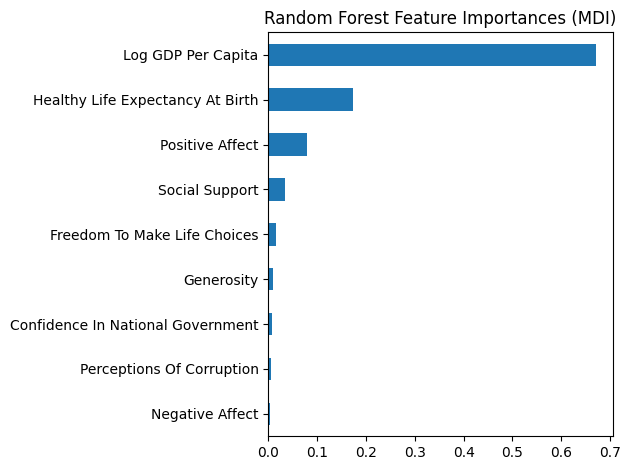

In [ ]:
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

Permutation importance of the same model

In [ ]:
from sklearn.inspection import permutation_importance

train_result = permutation_importance(
    rf, X_train, y_train, n_repeats=10, random_state=0, n_jobs=2) #repeat for 10 times

test_result = permutation_importance(
    rf, X_val, y_val, n_repeats=10, random_state=0, n_jobs=2)

sorted_importances_idx = train_result.importances_mean.argsort()

In [ ]:
train_result

{'importances_mean': array([0.69357391, 0.03366092, 0.1537462 , 0.02650558, 0.01026767,
        0.00386278, 0.11047002, 0.00357888, 0.00886665]),
 'importances_std': array([0.01437411, 0.0015718 , 0.00914994, 0.00124047, 0.00062128,
        0.00044808, 0.00339579, 0.00029675, 0.00071923]),
 'importances': array([[0.66222463, 0.6908199 , 0.68122614, 0.70128617, 0.70283721,
         0.70548765, 0.70436523, 0.69816435, 0.71041503, 0.6789128 ],
        [0.03157822, 0.03564457, 0.03144585, 0.0330041 , 0.03161537,
         0.03478923, 0.03450686, 0.03473304, 0.03560304, 0.03368895],
        [0.14760987, 0.15496836, 0.1464255 , 0.14998645, 0.15673694,
         0.15986016, 0.14496092, 0.1609145 , 0.17411272, 0.14188657],
        [0.02674377, 0.02736714, 0.02655192, 0.02754269, 0.0259705 ,
         0.02692101, 0.02724226, 0.02705848, 0.02301492, 0.02664313],
        [0.01147247, 0.01062857, 0.00982745, 0.00923762, 0.01033304,
         0.01087452, 0.00949679, 0.01026905, 0.01010056, 0.01043661],

In [ ]:
train_importances = pd.DataFrame(
    train_result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
test_importances = pd.DataFrame(
    test_result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)

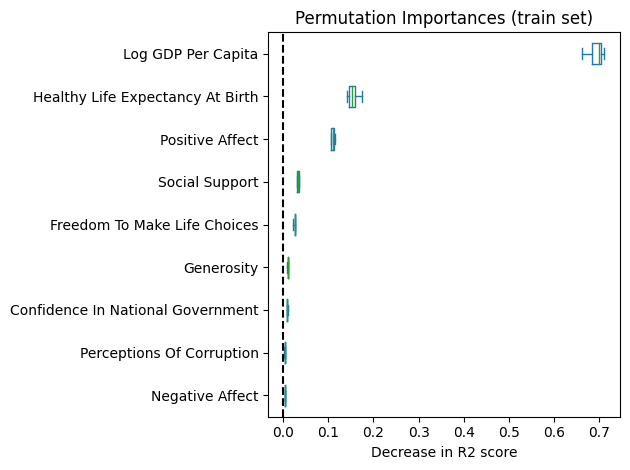

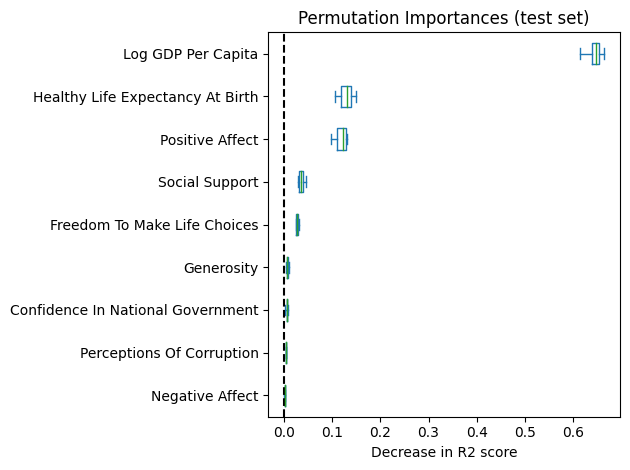

In [ ]:
for name, importances in zip(["train", "test"], [train_importances, test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in R2 score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

Other methods:
* SHAP
* LIME
* Conditional Variable Importance

## SHAP Implementation of Random Forest Feature Importance on Heart Disease Data

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 24.4 MB/s eta 0:00:00


In [ ]:
import shap
#initialize js vizualization
shap.initjs()

In [ ]:
# Fit shap to our random forest

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

In [ ]:
shap_values[0]

array([-1.0263689 , -0.25107232, -0.34185206, -0.01348998,  0.0373175 ,
       -0.00124907, -0.21014639,  0.02765684,  0.01604158])

Trying out shap's summary plot feature:

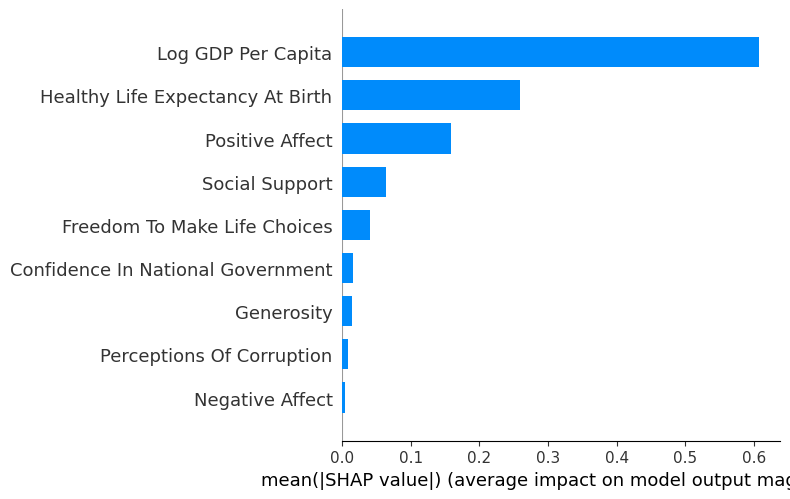

In [ ]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type="bar")

## LIME Implementation of Random Forest Feature Importance on Heart Disease Data

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=e12ef16b7962a4d1108fd6feacea98562a5fd30e145b9d346cd99796c39b0f1e
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


Lime requires a tabular explainer object to do it's analysis.

TO DO: once all packages we need are sorted, move all installs/import statements to top.

In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[0, 1],
    mode='regression'
)

First row only for now : we can expand this analysis to our whole data

In [ ]:
exp = explainer.explain_instance(
    data_row=X_val.iloc[0], 
    predict_fn=rf.predict
)

exp.show_in_notebook(show_table=True)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


##LIME Aggregate Weights

In [ ]:
def return_weights(exp):
    
    """Get weights from LIME explanation object"""
    
    exp_list = exp.as_map()[1]
    exp_list = sorted(exp_list, key=lambda x: x[0])
    exp_weight = [x[1] for x in exp_list]
    
    return exp_weight

In [ ]:
weights = []

#Iterate over rows in feature matrix
#change to random sample to decrease runtime
for x in X_val.values:
    
    #Get explanation
    exp = explainer.explain_instance(x, rf.predict, labels=X_val.columns)
    
    #Get weights
    exp_weight = return_weights(exp)
    weights.append(exp_weight)
    
#Create DataFrame
lime_weights = pd.DataFrame(data=weights,columns=X.columns)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fit

Text(0.5, 0, 'Mean |Weight|')

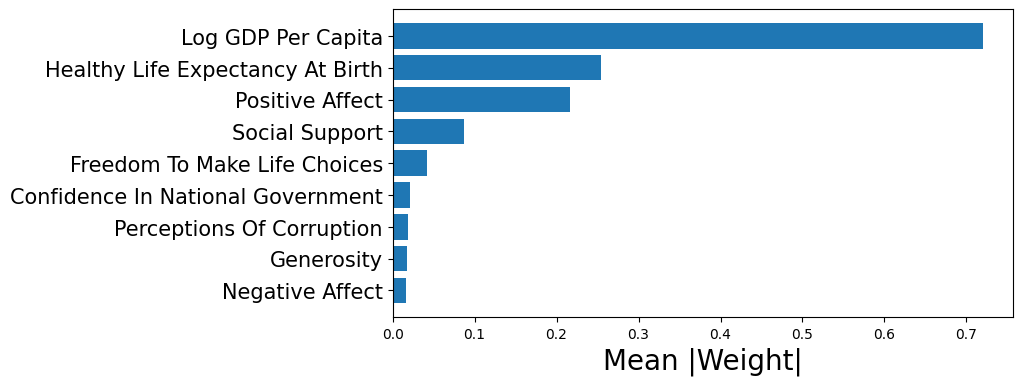

In [ ]:
#Get abs mean of LIME weights
abs_mean = lime_weights.abs().mean(axis=0)
abs_mean = pd.DataFrame(data={'feature':abs_mean.index, 'abs_mean':abs_mean})
abs_mean = abs_mean.sort_values('abs_mean')

#Plot abs mean
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4))

y_ticks = range(len(abs_mean))
y_labels = abs_mean.feature
plt.barh(y=y_ticks,width=abs_mean.abs_mean)

plt.yticks(ticks=y_ticks,labels=y_labels,size= 15)
plt.title('')
plt.ylabel('')
plt.xlabel('Mean |Weight|',size=20)

##Comparison

In [ ]:
shp_mean = {'mean1':pd.DataFrame(abs(np.array(shap_values))).mean()}
shp = pd.DataFrame(data=shp_mean)
shp = shp.assign(names = list(hap.columns[1:]))
shp = shp.sort_values(by='mean1', ascending=False)

In [ ]:
comp = {
    'P-Value': data['Variables'][1:],
    'DnR LR':dll['Variable Removed'][dll['Variable Removed'] != 'None'],
    'DnR RF':dlr['Variable Removed'][dlr['Variable Removed'] != 'None'],
    'MDI':mdi_importances.sort_values(ascending=False).index,
    'Permutation':test_importances.median().sort_values(ascending=False).index,
    'SHAP':list(shp['names']),
    'Lime':abs_mean.sort_values(by='abs_mean', ascending=False).index
}

pd.DataFrame(comp)

,P-Value,DnR LR,DnR RF,MDI,Permutation,SHAP,Lime
1,Log.GDP.Per.Capita,Log GDP Per Capita,Log GDP Per Capita,Log GDP Per Capita,Log GDP Per Capita,Log GDP Per Capita,Log GDP Per Capita
2,Social.Support,Social Support,Social Support,Healthy Life Expectancy At Birth,Healthy Life Expectancy At Birth,Healthy Life Expectancy At Birth,Healthy Life Expectancy At Birth
3,Healthy.Life.Expectancy.At.Birth,Healthy Life Expectancy At Birth,Healthy Life Expectancy At Birth,Positive Affect,Positive Affect,Positive Affect,Positive Affect
4,Freedom.To.Make.Life.Choices,Freedom To Make Life Choices,Freedom To Make Life Choices,Social Support,Social Support,Social Support,Social Support
5,Generosity,Generosity,Generosity,Freedom To Make Life Choices,Freedom To Make Life Choices,Freedom To Make Life Choices,Freedom To Make Life Choices
6,Perceptions.Of.Corruption,Perceptions Of Corruption,Perceptions Of Corruption,Generosity,Confidence In National Government,Confidence In National Government,Confidence In National Government
7,Positive.Affect,Positive Affect,Positive Affect,Confidence In National Government,Generosity,Generosity,Perceptions Of Corruption
8,Negative.Affect,Negative Affect,Negative Affect,Perceptions Of Corruption,Perceptions Of Corruption,Perceptions Of Corruption,Generosity
9,Confidence.In.National.Government,Confidence In National Government,Confidence In National Government,Negative Affect,Negative Affect,Negative Affect,Negative Affect
